In [8]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Import the data into Pandas DataFrame
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [30]:
# Get the columns and the rows that are not null
print(city_df.count())
# Get the data types of each column
print(" ")
print(city_df.dtypes)

city            120
driver_count    120
type            120
dtype: int64
 
city            object
driver_count     int64
type            object
dtype: object


18

In [31]:
# Get the columns and the rows that are not null
print(ride_df.count())
# Get the data types of each column
print(" ")
print(ride_df.dtypes)

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
 
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [33]:
# Merge the data frames
city_ride_df = pd.merge(ride_df, city_df, on=["city", "city"], how="left")

# Display the DataFrame
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [38]:
# Create the Urban city DataFrame
urban_cities_df = city_ride_df.loc[city_ride_df["type"]=="Urban"]
# Create the Suburban city DataFrames
suburban_cities_df = city_ride_df.loc[city_ride_df["type"]=="Suburban"]
# Create the Rural city DataFrames
rural_cities_df = city_ride_df.loc[city_ride_df["type"]=="Rural"]

In [42]:
# Get the number of rides for each city in each city type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [44]:
# Get average fare for each city in each city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [45]:
# Get the average number of drivers for each city in each city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

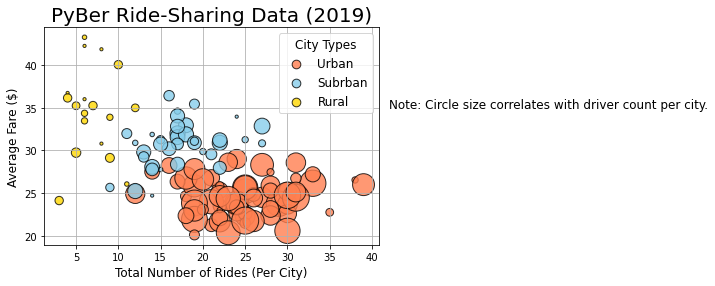

In [95]:
# Create a bubble chart for avg fares vs total rides
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color="coral", label="Urban", linewidths=1, alpha=0.8, edgecolor="k")
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color="skyblue", label="Subrban", linewidths=1, alpha=0.8, edgecolor="k")
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color="gold", label="Rural", linewidths=1, alpha=0.8, edgecolor="k")

# Format bubble size based on total drivers for each city type
plt.title("PyBer Ride-Sharing Data (2019)", fontsize="20")
plt.xlabel("Total Number of Rides (Per City)", fontsize="12")
plt.ylabel("Average Fare ($)", fontsize="12")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


# Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

In [4]:
# Determine mean, median and mode for:
# The total number of ride for each city type
    
# The average fares for each city type
    
# The total number of drivers for each city type

In [5]:
# Create box-and-whisker plots to determine any outliers for:
# The number of rides for each city type

# The fares for each city type

# The number of drivers for each city type

In [6]:
# Create a pie chart for the percent of total fares, rides, and drivers